In [29]:
#Importing Librates
import numpy as np
import pandas as pd
from tensorflow.keras import layers,models,optimizers,utils
import tensorflow as tf
from tensorflow.keras.datasets import reuters
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
#Loading the data
(train_data,train_labels),(test_data,test_labels)=reuters.load_data(num_words=(10000))


2110848/2110848 [==============================] - 0s 0us/step


In [3]:
#Printing the length of the dataset
print(len(train_data))
print(len(test_data))

8982
2246


In [4]:
#Preparing Dataset
train_data[0] #every word has some number agaist it

[1,
 2,
 2,
 8,
 43,
 10,
 447,
 5,
 25,
 207,
 270,
 5,
 3095,
 111,
 16,
 369,
 186,
 90,
 67,
 7,
 89,
 5,
 19,
 102,
 6,
 19,
 124,
 15,
 90,
 67,
 84,
 22,
 482,
 26,
 7,
 48,
 4,
 49,
 8,
 864,
 39,
 209,
 154,
 6,
 151,
 6,
 83,
 11,
 15,
 22,
 155,
 11,
 15,
 7,
 48,
 9,
 4579,
 1005,
 504,
 6,
 258,
 6,
 272,
 11,
 15,
 22,
 134,
 44,
 11,
 15,
 16,
 8,
 197,
 1245,
 90,
 67,
 52,
 29,
 209,
 30,
 32,
 132,
 6,
 109,
 15,
 17,
 12]

In [5]:
#Reversing the number and the word
get_reuter_items=reuters.get_word_index()

reverse_word_index=dict([(value,key) for (key,value) in get_reuter_items.items()])

decode_word= "".join([reverse_word_index.get((i-3),"?") for i in train_data[0]])

550378/550378 [==============================] - 0s 0us/step


In [6]:
#Making matrix of zero and one.
def vector_data(sequence,dimension=10000):
  result=np.zeros((len(sequence),dimension))
  for i,sequence in enumerate(sequence):
    result[i,sequence]=1
  return result

In [7]:
#Making a matrix od train and test data

x_train=vector_data(train_data)
x_test=vector_data(test_data)

In [8]:
#Making one hot encoding function
def to_one_hot(labels,dimension=46):
  results=np.zeros((len(labels),dimension))
  for i,labels in enumerate(labels):
    results[i,labels]=1
  return results


In [9]:
#Using onhot encode function to encode the data
one_hot_encoded_train=to_one_hot(train_labels)
one_hot_encoded_test=to_one_hot(test_labels)

## **Another way using one hot encoding is using the to_categorical() function**

In [11]:
train_label=utils.to_categorical(train_labels)
test_label=utils.to_categorical(test_labels)

In [15]:
#Spliting the data into the validation and the traaining part.
x_val=x_train[:1000]
partial_x_train=x_train[1000:]

y_val=one_hot_encoded_train[:1000]
partial_y_train=one_hot_encoded_train[1000:]

## **BUILDING NEURAL NETWORK**

In [18]:
#Architecturing the model
model=models.Sequential()

model.add(layers.Dense(64,activation="relu",input_shape=(10000,)))
model.add(layers.Dense(64,activation="relu"))
model.add(layers.Dense(46,activation="softmax"))

In [20]:
#Compilation Steps:
model.compile(optimizer="rmsprop",loss="categorical_crossentropy",metrics=["acc"])

In [25]:
#Traing the model
history=model.fit(partial_x_train,partial_y_train,epochs=20,batch_size=512,validation_data=(x_val,y_val))

Epoch 1/20
16/16 [==============================] - 2s 70ms/step - loss: 2.7705 - acc: 0.5078 - val_loss: 1.8118 - val_acc: 0.6300
Epoch 2/20
16/16 [==============================] - 1s 53ms/step - loss: 1.4668 - acc: 0.6991 - val_loss: 1.3148 - val_acc: 0.7130
Epoch 3/20
16/16 [==============================] - 1s 53ms/step - loss: 1.0627 - acc: 0.7800 - val_loss: 1.1514 - val_acc: 0.7540
Epoch 4/20
16/16 [==============================] - 1s 51ms/step - loss: 0.8380 - acc: 0.8191 - val_loss: 1.0489 - val_acc: 0.7760
Epoch 5/20
16/16 [==============================] - 1s 52ms/step - loss: 0.6695 - acc: 0.8561 - val_loss: 1.0228 - val_acc: 0.7740
Epoch 6/20
16/16 [==============================] - 1s 54ms/step - loss: 0.5335 - acc: 0.8880 - val_loss: 0.9529 - val_acc: 0.8050
Epoch 7/20
16/16 [==============================] - 1s 51ms/step - loss: 0.4302 - acc: 0.9087 - val_loss: 0.9393 - val_acc: 0.8050
Epoch 8/20
16/16 [==============================] - 1s 53ms/step - loss: 0.3496 - a

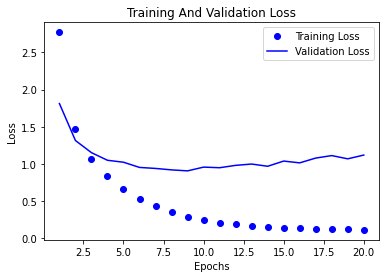

In [30]:
#Plotting VALIDATION AND TRAINING LOSS
history_dict=history.history

loss_value=history_dict["loss"]
val_loss_value=history_dict["val_loss"]

epochs=range(1,len(loss_value)+1)

plt.plot(epochs,loss_value,'bo',label="Training Loss")
plt.plot(epochs,val_loss_value,'b',label="Validation Loss")

plt.title("Training And Validation Loss")

plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


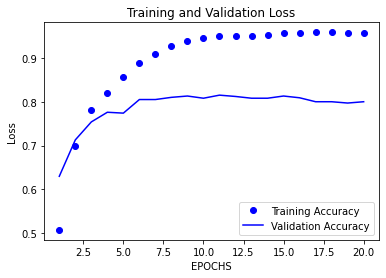

In [32]:
#Plotting The Accuracy
acc_value=history_dict["acc"]
val_acc_value=history_dict["val_acc"]

epochs=range(1,len(acc_value)+1)

plt.plot(epochs,acc_value,'bo',label="Training Accuracy")
plt.plot(epochs,val_acc_value,'b',label="Validation Accuracy")

plt.title("Training and Validation Loss")
plt.xlabel("EPOCHS")
plt.ylabel("Loss")

plt.legend()
plt.show()


In [33]:
# Making pREDICTION
prediction=model.predict(x_test)

71/71 [==============================] - 0s 3ms/step


In [34]:
##As it shows the probability when we sum it will show 1

prediction[0].sum()

1.0

In [36]:
#Getting the maximum value as the return
prediction[1].argmax()

10